In [158]:
import pandas as pd
import numpy as np
from datetime import datetime


In [95]:
import matplotlib.pyplot as plt
plt.close('all')

In [96]:
%matplotlib inline

In [97]:
df = pd.read_csv("./download/example.csv")

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24792 entries, 0 to 24791
Data columns (total 7 columns):
Unnamed: 0      24792 non-null int64
s3_keys         24792 non-null object
date            24792 non-null object
timestamp       24792 non-null int64
image_format    24792 non-null object
human_date      24792 non-null object
simple_keys     24792 non-null object
dtypes: int64(2), object(5)
memory usage: 1.3+ MB


In [99]:
df.head()

,Unnamed: 0,s3_keys,date,timestamp,image_format,human_date,simple_keys
0,0,2019-04-01/1554115423.jpeg,2019-04-01,1554115423,jpeg,2019-04-01 10:43:43,1554115423.jpeg
1,1,2019-04-01/1554115424.jpeg,2019-04-01,1554115424,jpeg,2019-04-01 10:43:44,1554115424.jpeg
2,2,2019-04-01/1554115425.jpeg,2019-04-01,1554115425,jpeg,2019-04-01 10:43:45,1554115425.jpeg
3,3,2019-04-01/1554115426.jpeg,2019-04-01,1554115426,jpeg,2019-04-01 10:43:46,1554115426.jpeg
4,4,2019-04-01/1554115427.jpeg,2019-04-01,1554115427,jpeg,2019-04-01 10:43:47,1554115427.jpeg


In [100]:
df.sort_values(by=["timestamp"], ascending=False).head()

,Unnamed: 0,s3_keys,date,timestamp,image_format,human_date,simple_keys
24791,24791,2019-04-07/1554618598.jpeg,2019-04-07,1554618598,jpeg,2019-04-07 06:29:58,1554618598.jpeg
24790,24790,2019-04-07/1554618597.jpeg,2019-04-07,1554618597,jpeg,2019-04-07 06:29:57,1554618597.jpeg
24789,24789,2019-04-07/1554618596.jpeg,2019-04-07,1554618596,jpeg,2019-04-07 06:29:56,1554618596.jpeg
24788,24788,2019-04-07/1554618595.jpeg,2019-04-07,1554618595,jpeg,2019-04-07 06:29:55,1554618595.jpeg
24787,24787,2019-04-07/1554618594.jpeg,2019-04-07,1554618594,jpeg,2019-04-07 06:29:54,1554618594.jpeg


In [101]:
df["timestamp"].max(), df["timestamp"].min()

(1554618598, 1554115423)

In [201]:
df["bucketing"] = pd.cut(df["timestamp"], 15)

In [202]:
# df['timestamp'].cat.categories    
df.groupby('bucketing').size()

bucketing
(1554114919.825, 1554148968.0]     3668
(1554148968.0, 1554182513.0]          0
(1554182513.0, 1554216058.0]          0
(1554216058.0, 1554249603.0]          0
(1554249603.0, 1554283148.0]          0
(1554283148.0, 1554316693.0]          0
(1554316693.0, 1554350238.0]          0
(1554350238.0, 1554383783.0]         42
(1554383783.0, 1554417328.0]        141
(1554417328.0, 1554450873.0]       3126
(1554450873.0, 1554484418.0]       1718
(1554484418.0, 1554517963.0]      14526
(1554517963.0, 1554551508.0]        289
(1554551508.0, 1554585053.0]        403
(1554585053.0, 1554618598.0]        879
dtype: int64

In [203]:
get_human_date = lambda ts : datetime.utcfromtimestamp(int(ts)).strftime('%Y-%m-%d %H:%M:%S')

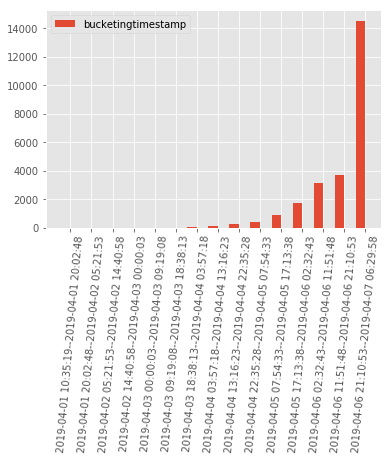

In [237]:
plt.style.use('ggplot')

a = df.groupby('bucketing').size()

categories = df['bucketing'].cat.categories
labels = np.array([ get_human_date(x.left)+"--"+ get_human_date(x.right) for x in categories])

ind = np.array([x for x, _ in enumerate(categories)])
width = 0.45       
plt.bar(ind, a.sort_values(), width, label='bucketingtimestamp')

plt.xticks(ind + width / 2, labels)
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.show()


In [232]:
a.sort_values()

bucketing
(1554148968.0, 1554182513.0]          0
(1554182513.0, 1554216058.0]          0
(1554216058.0, 1554249603.0]          0
(1554249603.0, 1554283148.0]          0
(1554283148.0, 1554316693.0]          0
(1554316693.0, 1554350238.0]          0
(1554350238.0, 1554383783.0]         42
(1554383783.0, 1554417328.0]        141
(1554517963.0, 1554551508.0]        289
(1554551508.0, 1554585053.0]        403
(1554585053.0, 1554618598.0]        879
(1554450873.0, 1554484418.0]       1718
(1554417328.0, 1554450873.0]       3126
(1554114919.825, 1554148968.0]     3668
(1554484418.0, 1554517963.0]      14526
dtype: int64